# Bagging vs Boosting vs RandomForest

Docente: Gabriela Espinoza Picado

Como vimos en el primer notebook, un árbol de regresión lineal tuvo problemas para hacer una predicción para predecir el peso de los peces. Por ende, en este ejercicio utilizamos los métodos de ensamble Bagging, AdaBoost y Random Forest para obtener un mejor desempeño.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestRegressor

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
path=("/Fish.csv")
df = pd.read_csv(path)
df

Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]

Antes de proceder al modelo, vamos a eliminar la columna de especies ya que es categórica.

In [3]:
df.drop(["Species"], axis=1, inplace=True)
df

Weight  Length1  Length2  Length3   Height   Width
0     242.0     23.2     25.4     30.0  11.5200  4.0200
1     290.0     24.0     26.3     31.2  12.4800  4.3056
2     340.0     23.9     26.5     31.1  12.3778  4.6961
3     363.0     26.3     29.0     33.5  12.7300  4.4555
4     430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...      ...      ...      ...      ...     ...
154    12.2     11.5     12.2     13.4   2.0904  1.3936
155    13.4     11.7     12.4     13.5   2.4300  1.2690
156    12.2     12.1     13.0     13.8   2.2770  1.2558
157    19.7     13.2     14.3     15.2   2.8728  2.0672
158    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 6 columns]

# Entrenamiento de Modelos

Antes de proceder, vale la pena recordar cual es el estado de nuestro proyecto:

Sabemos ya que una árbol de regresión no es mejor que una regresión lineal simple. Por ende, utilizaremos tres enfoques diferentes. Cada uno crear un número adicionales de árboles y utiliza métodos distintos para resoler este problema.

#Bagging y Random Forest

En el caso del bagging y, por extensión, de Random Forest:

* Diversidad en Lugar de Poda: En lugar de construir un solo árbol grande y luego podarlo, estas técnicas construyen muchos árboles a partir de diferentes muestras del conjunto de datos. Cada árbol puede crecer bastante, pero la diversidad entre los árboles reduce el riesgo de sobreajuste.

* Promedio de Resultados: Al tomar el promedio o la votación mayoritaria de las predicciones de muchos árboles, se mitigan los efectos de cualquier árbol individual que esté sobreajustado.

* Aleatoriedad en Características: Específicamente en Random Forest, la selección aleatoria de características para cada división en cada árbol ayuda a asegurar que los árboles sean diferentes entre sí, reduciendo aún más el riesgo de sobreajuste.

#Boosting
En el caso del boosting:

* Enfoque en Errores: Cada nuevo árbol en un modelo de boosting intenta corregir los errores de los árboles anteriores. Esto puede llevar a modelos más complejos, pero el proceso iterativo y el ajuste de los pesos de cada árbol ayudan a evitar el sobreajuste.

* Ponderación de Árboles: Al ponderar los árboles basándose en su desempeño, el boosting da más importancia a los árboles que mejor clasifican los datos difíciles. Esto es diferente a la poda, pero igualmente ayuda a mejorar la precisión del modelo completo.

#Poda de Árboles
La poda de árboles, por otro lado, es una técnica utilizada en árboles de decisión individuales y tiene como objetivo reducir la complejidad del árbol eliminando partes del árbol que proporcionan poco poder predictivo. Esto se hace para evitar el sobreajuste, asegurando que el modelo sea más generalizable a datos no vistos.

Con esto en mente, vamos a entrenar nuestros modelos como de costumbre,

In [5]:
X = df.drop(["Weight"], axis=1)
y = df["Weight"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [6]:
bagging = BaggingRegressor()
bagging.fit(X_train, y_train)

BaggingRegressor()

In [7]:
boosting = AdaBoostRegressor()
boosting.fit(X_train, y_train)

AdaBoostRegressor()

In [8]:
random = RandomForestRegressor()
random.fit(X_train, y_train)

RandomForestRegressor()

In [9]:
y_bagging_predict = bagging.predict(X_test)
y_boosting_predict = boosting.predict(X_test)
y_random_predict = random.predict(X_test)

Ahora vamos a medir la precisión de nuestros modelos recordando que una regresión lineal simple nos dió un error cuadrado promedio de 26796 y un error absoluto de 129.

In [10]:
mse = mean_squared_error(y_test, y_bagging_predict)
ase = mean_absolute_error(y_test, y_bagging_predict)
rmse = np.sqrt(mse)

print("mse:",round(mse))
print("ase:", round(ase))
print("RMSE:", round(rmse))

mse: 5645
ase: 47
RMSE: 75


In [11]:
mse = mean_squared_error(y_test, y_boosting_predict)
ase = mean_absolute_error(y_test, y_boosting_predict)
rmse = np.sqrt(mse)

print("mse:",round(mse))
print("ase:", round(ase))
print("RMSE:", round(rmse))

mse: 7304
ase: 64
RMSE: 85


In [12]:
mse = mean_squared_error(y_test, y_random_predict)
ase = mean_absolute_error(y_test, y_random_predict)
rmse = np.sqrt(mse)

print("mse:",round(mse))
print("ase:", round(ase))
print("RMSE:", round(rmse))

mse: 3938
ase: 44
RMSE: 63


Interpretación de los Resultados
* Bagging (RMSE = 60): Este método ha dado el mejor resultado en términos de RMSE. El Bagging, o Bootstrap Aggregating, funciona entrenando múltiples modelos (usualmente del mismo tipo) en diferentes subconjuntos del conjunto de datos de entrenamiento y luego promediando sus predicciones. Un RMSE más bajo aquí indica que este enfoque ha sido bastante efectivo para tu conjunto de datos.

* Boosting (RMSE = 90): Este método ha mostrado el rendimiento más bajo entre los tres en términos de RMSE. El Boosting construye modelos de manera secuencial, donde cada modelo subsiguiente intenta corregir los errores del modelo anterior. Aunque es una técnica poderosa, puede no ser siempre la mejor opción, especialmente si el modelo se sobreajusta o si los datos no se ajustan bien a este enfoque.

* Random Forest (RMSE = 68): Este método ha mostrado un rendimiento intermedio. Random Forest es una variante del método de Bagging, pero utiliza árboles de decisión como modelos base y realiza divisiones aleatorias de las características durante la construcción del árbol. Un RMSE de 68 es un buen resultado, aunque no tan bajo como el obtenido por el Bagging en este caso.

Elección del Mejor Modelo

Basado en estos resultados de RMSE, el modelo de Bagging parece ser el más adecuado para tu conjunto de datos. Sin embargo, es importante considerar otros factores además del RMSE al tomar una decisión final:

Los árboles de decisión individuales son más fáciles de interpretar que los modelos de ensamblaje.

Sobreajuste: ¿Cómo se comportan estos modelos en los datos no vistos? A veces, un modelo con un RMSE ligeramente más alto en el conjunto de entrenamiento puede generalizar mejor a datos no vistos.

Complejidad y Tiempo de Entrenamiento: Los modelos de ensamblaje pueden ser más complejos y requerir más tiempo para entrenarse que los modelos individuales. Esto puede ser un factor si los recursos de cómputo o el tiempo son una preocupación.

En resumen, aunque el Bagging muestra el mejor rendimiento en términos de RMSE en tu conjunto de datos, la elección final del modelo debe basarse en una combinación de precisión, comprensión del problema, requisitos de interpretación y recursos disponibles.

En este caso, hemos visto que los tres métodos han dado mucho mejores resultados que una regresión lineal simple. Como regla general, hay que recordar que un solo árbol de decisión hace malas predicciones. Varios árboles de decisión hacen excelentes predicciones.

En este proyecto en particular, Bagging y Random Forests dieron mejor resultados. Hay que recordar que Boosting es una herramienta potente cuando lidiamos con data sets más grandes, ya que mejor exponencialmente a medida que genera más árboles de decisión.

Finalmente, podemos graficar nuevamente los residuales para ver el resultado de nuestros modelos.

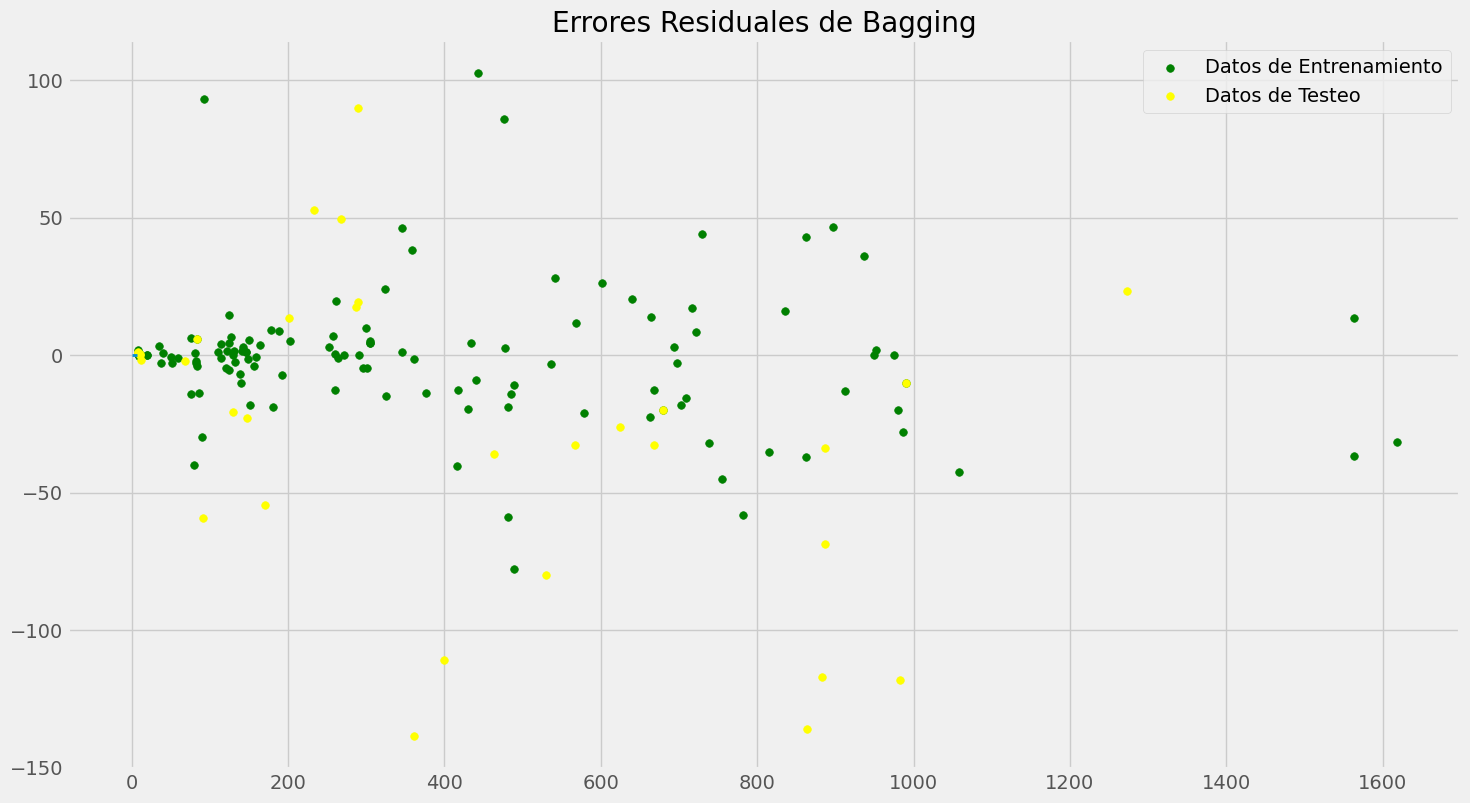

In [ ]:
plt.style.use('fivethirtyeight')
plt.scatter(bagging.predict(X_train), bagging.predict(X_train) - y_train,
            color = "green", s = 30, label = 'Datos de Entrenamiento')
plt.scatter(bagging.predict(X_test), bagging.predict(X_test) - y_test,
            color = "yellow", s = 30, label = 'Datos de Testeo')
plt.hlines(y = 0, xmin = 0, xmax = 7, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Errores Residuales de Bagging")

plt.show()

una vez escogido bagging



In [13]:
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Crear un modelo base para el Bagging (puede ser cualquier regresor, aquí usamos un árbol de decisión como ejemplo)
base_model = DecisionTreeRegressor(random_state=42)

# Crear el modelo de Bagging con el modelo base
bagging_model = BaggingRegressor(base_estimator=base_model, random_state=42)

# Configurar la búsqueda de cuadrícula para encontrar los mejores hiperparámetros
param_grid = {
    'n_estimators': [10, 50, 100],  # Número de árboles en el bosque
    'max_samples': [0.5, 1.0],      # Número máximo de muestras para entrenar cada árbol base
    'max_features': [0.5, 1.0]      # Número máximo de características para entrenar cada árbol base
}

# Realizar la búsqueda de cuadrícula
grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Entrenar el modelo con los mejores parámetros
best_bagging_model = grid_search.best_estimator_
best_bagging_model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = best_bagging_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE del modelo de Bagging:", rmse)


Mejores parámetros: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10}
RMSE del modelo de Bagging: 80.68643875065926


Mejores Parámetros:

* 'max_features': 1.0: Esto significa que el mejor modelo utiliza todas las características disponibles cuando construye cada árbol base. En otras palabras, no hay una selección o reducción aleatoria de características en la construcción de los árboles.
* 'max_samples': 1.0: Indica que cada árbol base se entrena utilizando el 100% de las muestras del conjunto de entrenamiento. No se realiza un muestreo aleatorio de los datos; cada árbol ve todos los datos de entrenamiento.
* 'n_estimators': 10: El número óptimo de árboles base (o modelos individuales) en tu ensamblaje de Bagging es 10. Esto significa que tu modelo final de Bagging consiste en 10 árboles de decisión individuales.

El RMSE (Raíz del Error Cuadrático Medio) es una medida de la diferencia entre los valores predichos por el modelo y los valores reales. Un RMSE de 80.68 sugiere que, en promedio, las predicciones del modelo se desvían aproximadamente 80.68 unidades del valor real.
Si este RMSE es más alto que los resultados anteriores que obtuviste con otros modelos, podría indicar que el modelo de Bagging, con la configuración actual, no está funcionando tan bien como los otros modelos para este conjunto de datos específico.

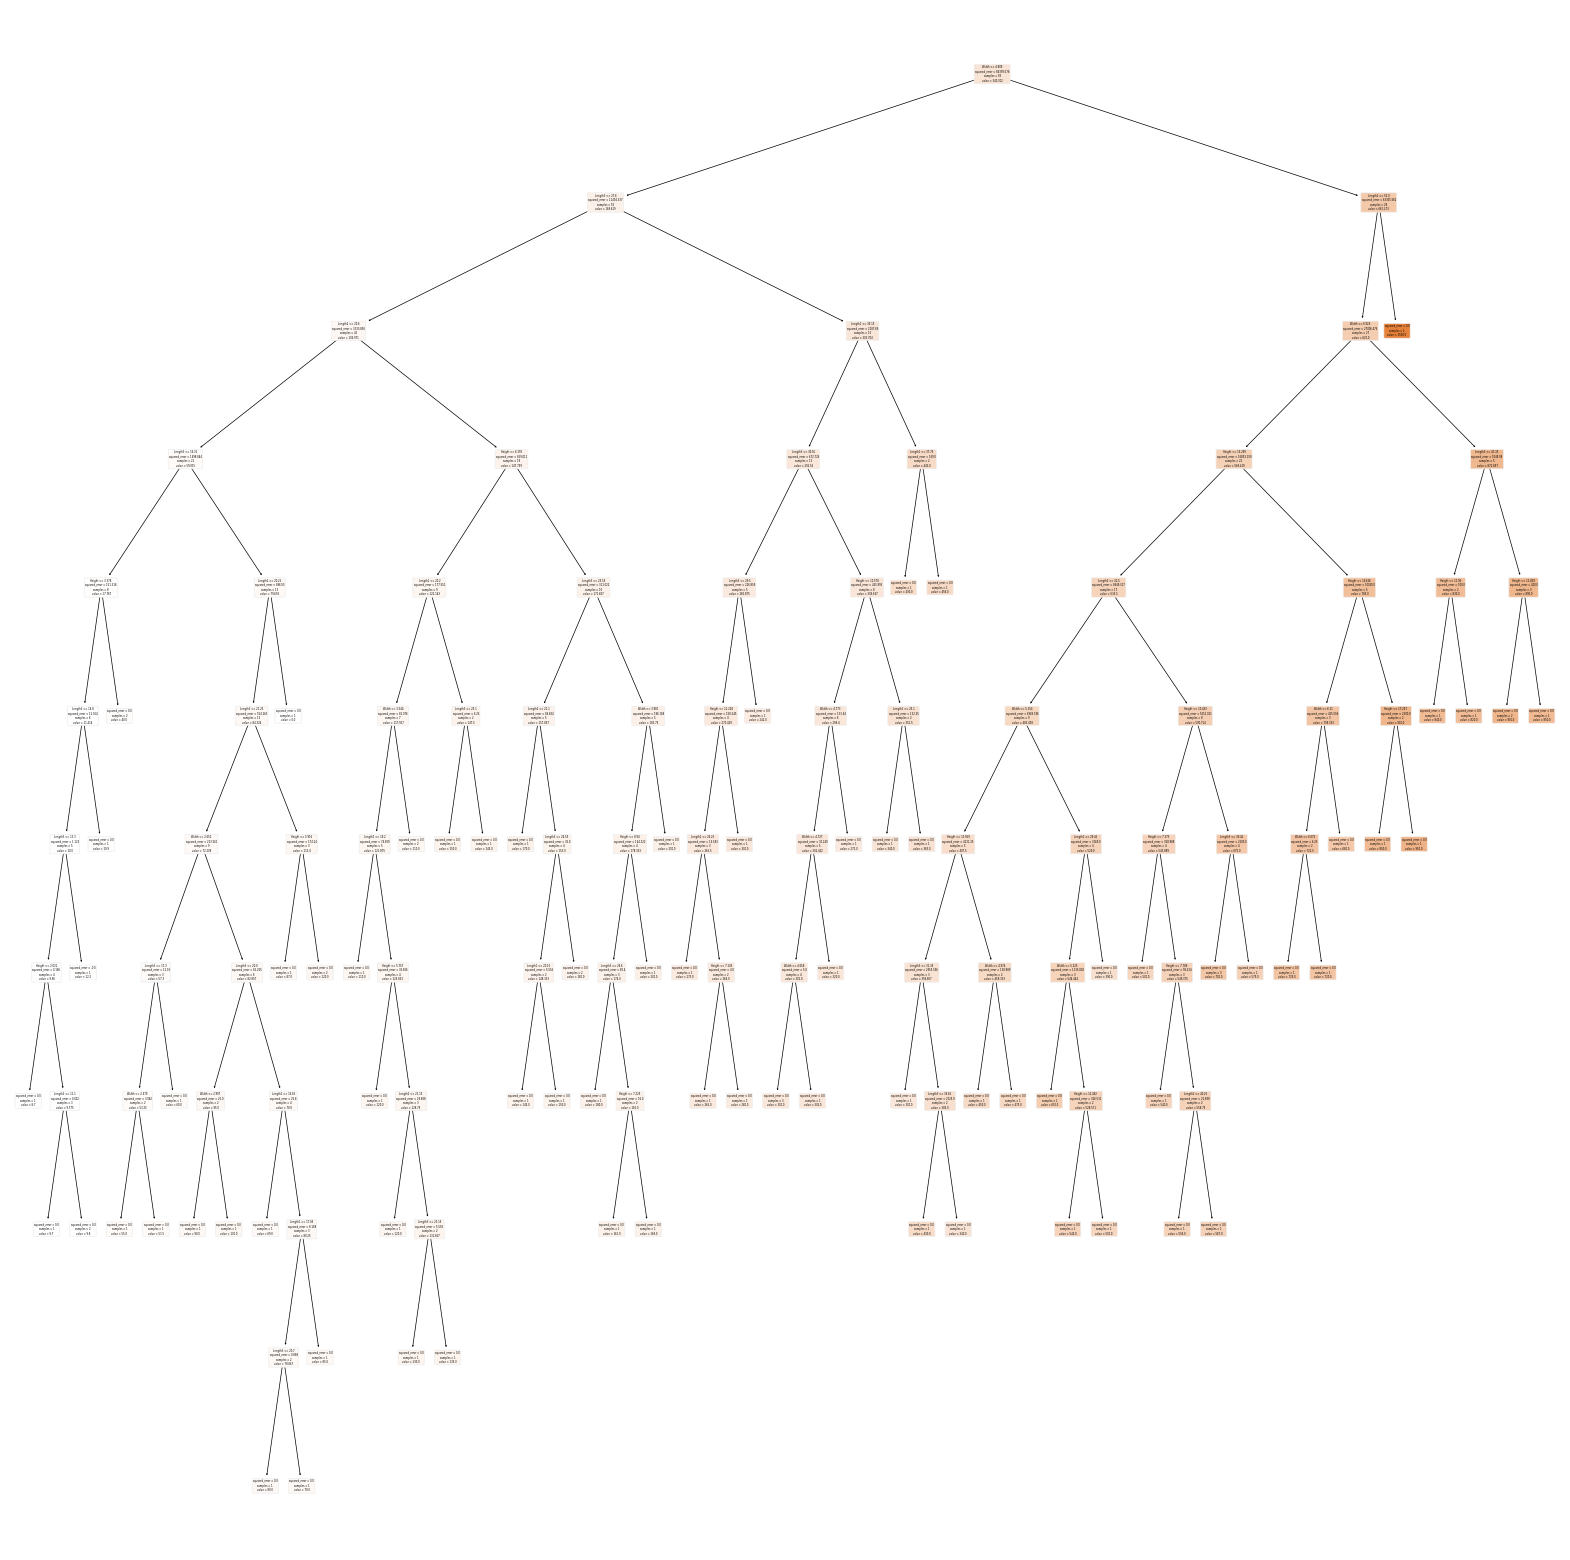

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Elegir uno de los árboles del modelo de Bagging
single_tree = best_bagging_model.estimators_[5]

# Visualizar el árbol
plt.figure(figsize=(20,20))
plot_tree(single_tree, filled=True, feature_names=X.columns, rounded=True)
plt.show()


#Interpretación de un Árbol de Decisión #

Un árbol de decisión es básicamente una serie de preguntas o decisiones que se toman en base a los valores de las características de los datos. Cada nodo en el árbol representa una característica (o atributo), y cada división (o rama) representa una decisión que se toma en base a esa característica.

* Nodo Raíz: El nodo en la parte superior del árbol (donde comienza el árbol) es el nodo raíz. Representa la característica que proporciona la división más significativa entre las clases o valores objetivo.

* Nodos Internos: Cada nodo interno (los nodos debajo del nodo raíz) representa otra característica que ayuda a dividir los datos en grupos más homogéneos.

* Ramas: Las ramas que salen de un nodo representan las posibles respuestas a la pregunta o decisión planteada por ese nodo.

* Nodos Hoja: Los nodos en la parte inferior del árbol (donde terminan las ramas) son los nodos hoja. En un árbol de regresión, estos nodos representan el valor predicho para las observaciones que llegan a ese nodo.

#Cómo Leer el Árbol#

* Comienzas en el nodo raíz y te haces una pregunta basada en la característica que representa ese nodo.
* Dependiendo de la respuesta a esa pregunta, sigues la rama correspondiente hacia el siguiente nodo.
* Continúas este proceso hasta llegar a un nodo hoja, que te da la predicción final.

#Ejemplo de Visualización#

Cuando visualizas un árbol con plot_tree, cada nodo mostrará:

* La condición o pregunta basada en la característica.
* El error o la medida de impureza del nodo (por ejemplo, MSE para regresión).
* El número de muestras que llegaron a ese nodo.
* El valor promedio de la variable objetivo para esas muestras.

# Sobre la Complejidad y la Interpretación#

* Árboles Grandes y Complejos: Si el árbol es muy grande, puede ser difícil visualizarlo completamente en una sola pantalla. Puedes limitar la profundidad del árbol al entrenarlo para simplificar la visualización.
* Interpretación: La interpretación de un árbol grande puede ser compleja. En el contexto de un modelo de Bagging, recuerda que estás viendo solo uno de los muchos árboles, y cada árbol contribuye a la predicción final.

Si el árbol es demasiado grande para visualizarlo o interpretarlo fácilmente, podrías considerar limitar la profundidad del árbol al entrenar tu modelo de Bagging, o podrías explorar otros modelos que sean más interpretables.

In [14]:
# Crear un modelo base para el Bagging con parámetros de 'poda'
base_model_pruned = DecisionTreeRegressor(
    random_state=42,
    max_depth=5,  # Limita la profundidad máxima del árbol
    min_samples_split=10,  # Número mínimo de muestras requeridas para dividir un nodo
    min_samples_leaf=5  # Número mínimo de muestras requeridas en una hoja
)

# Crear el modelo de Bagging con el modelo base podado
bagging_model_pruned = BaggingRegressor(base_estimator=base_model_pruned, random_state=42)

# Realizar la búsqueda de cuadrícula con el nuevo modelo base podado
grid_search_pruned = GridSearchCV(estimator=bagging_model_pruned, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_pruned.fit(X_train, y_train)

# Mejores parámetros encontrados con el modelo base podado
best_params_pruned = grid_search_pruned.best_params_
print("Mejores parámetros con poda:", best_params_pruned)

# Entrenar el modelo con los mejores parámetros y el modelo base podado
best_bagging_model_pruned = grid_search_pruned.best_estimator_
best_bagging_model_pruned.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred_pruned = best_bagging_model_pruned.predict(X_test)
rmse_pruned = np.sqrt(mean_squared_error(y_test, y_pred_pruned))
print("RMSE del modelo de Bagging con poda:", rmse_pruned)


Mejores parámetros con poda: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10}
RMSE del modelo de Bagging con poda: 72.90504938918534
